In [1]:
import os
import torch
import numpy as np
from glob import glob
from tqdm.auto import tqdm
from sklearn.linear_model import LogisticRegression
import pandas as pd
from utils.store_data import ReadData
import numpy as np
import torch
from utils.arguments import Arguments
from tqdm import tqdm
from linear_probe import get_linear_acc
import random
import os
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve

In [3]:
pope_results=np.load('./pope_layers.npy',allow_pickle=True)
pope_scores=[x['score'] for x in pope_results if x['layer'] == 20]
pope_scores,len(pope_scores)

([np.float64(0.8309315080562562),
  np.float64(0.7112495732331854),
  np.float64(0.6518931926563067),
  np.float64(0.6674963380653972),
  np.float64(0.7052913578343374),
  np.float64(0.712807960440093),
  np.float64(0.7187358891617749),
  np.float64(0.710897146444344),
  np.float64(0.692992213570634),
  np.float64(0.657135541140321)],
 10)

In [4]:
vizwiz_results=np.load('./VizWiz_layers.npy',allow_pickle=True)
vizwiz_scores=[x['score'] for x in vizwiz_results if x['layer'] == 20]
vizwiz_scores,len(vizwiz_scores)

([np.float64(0.6964204301880116),
  np.float64(0.7166599187528495),
  np.float64(0.7250865887764615),
  np.float64(0.7207588511081322),
  np.float64(0.7115088221885015),
  np.float64(0.7101708639824712),
  np.float64(0.7070466932954089),
  np.float64(0.7197509169224068),
  np.float64(0.7213942324049565),
  np.float64(0.7189488224606864)],
 10)

In [5]:
vqa_results=np.load('./VQA_layers.npy',allow_pickle=True)
vqa_scores=[x['score'] for x in vqa_results if x['layer'] == 20]
vqa_scores,len(vqa_scores)

([np.float64(0.7773484430301653),
  np.float64(0.7238800316048101),
  np.float64(0.701545605091405),
  np.float64(0.6973812384323148),
  np.float64(0.6801447110649306),
  np.float64(0.6812757736143131),
  np.float64(0.6952084077453431),
  np.float64(0.6806940069920231),
  np.float64(0.6880675606931411),
  np.float64(0.6870826162721477)],
 10)

In [9]:
vqaidk_results=np.load('./VQAIDK_layers.npy',allow_pickle=True)
vqaidk_scores=[x['score'] for x in vqaidk_results if x['layer'] == 26]
vqaidk_scores,len(vqaidk_scores)

([np.float64(0.5291046756563997),
  np.float64(0.7252699407871822),
  np.float64(0.6204989136023619),
  np.float64(0.697322154218706),
  np.float64(0.6958750062198338),
  np.float64(0.6540901627108524),
  np.float64(0.5616758720206996),
  np.float64(0.5244418735798047),
  np.float64(0.5303901079763149),
  np.float64(0.5354820785855269)],
 10)

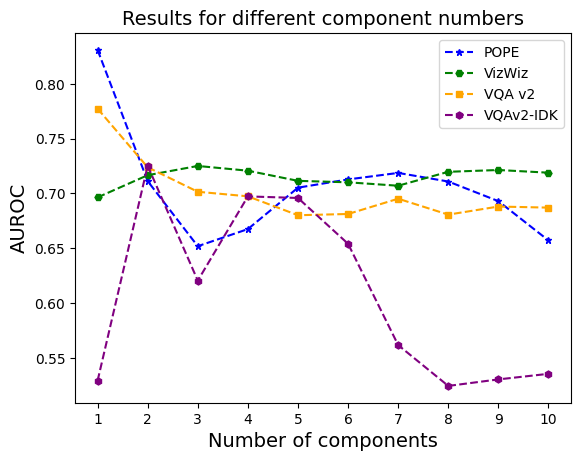

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values from 0 to 4π
x = np.arange(1,len(pope_scores)+1)



# Create the plot
plt.plot(x, pope_scores, linestyle='--',marker='*',color='blue',label='POPE',markersize=5)
plt.plot(x, vizwiz_scores, linestyle='--',marker='H',color='green',label='VizWiz',markersize=5)
plt.plot(x, vqa_scores, linestyle='--',marker='s',color='orange',label='VQA v2',markersize=5)
plt.plot(x, vqaidk_scores, linestyle='--',marker='h',color='purple',label='VQAv2-IDK',markersize=5)

# Add labels and title
plt.xlabel('Number of components',fontsize=14)
plt.ylabel('AUROC',fontsize=14)
plt.title('(A) Results for different component numbers',fontsize=14)

plt.xticks(np.arange(1, len(pope_scores)+1))  # Force integer ticks

# Add a legend
plt.legend()
plt.savefig('results_components.pdf',format="pdf",bbox_inches='tight')
# Show the plot
plt.show()
